In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

sepal_length = X[:, feature_names.index('sepal length (cm)')]
sepal_width = X[:, feature_names.index('sepal width (cm)')]

covariance_matrix = np.cov(sepal_length, sepal_width)
correlation_matrix = np.corrcoef(sepal_length, sepal_width)

print("Covariance Matrix:")
print(covariance_matrix)
print("\nCorrelation Matrix:")
print(correlation_matrix)

Covariance Matrix:
[[ 0.68569351 -0.042434  ]
 [-0.042434    0.18997942]]

Correlation Matrix:
[[ 1.         -0.11756978]
 [-0.11756978  1.        ]]


C:\Users\USER\AppData\Local\Temp\ipykernel_20704\2356568083.py:46: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  w_matrix = np.hstack((eigen_pairs[i][1].reshape(X.shape[1], 1)) for i in range(2))


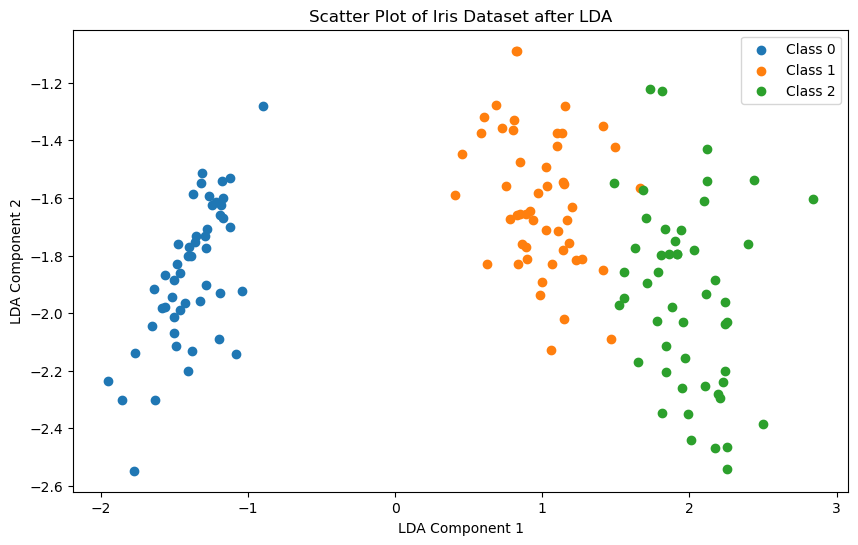

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

sepal_length = X[:, feature_names.index('sepal length (cm)')]
sepal_width = X[:, feature_names.index('sepal width (cm)')]

class_means = []
for c in np.unique(y):
    class_means.append(np.mean(X[y == c], axis=0))

within_class_scatter = np.zeros((X.shape[1], X.shape[1]))
for c, mean_vec in zip(np.unique(y), class_means):
    class_scatter = np.zeros((X.shape[1], X.shape[1]))
    for row in X[y == c]:
        row, mean_vec = row.reshape(-1, 1), mean_vec.reshape(-1, 1)
        class_scatter += (row - mean_vec).dot((row - mean_vec).T)
    within_class_scatter += class_scatter

overall_mean = np.mean(X, axis=0)
between_class_scatter = np.zeros((X.shape[1], X.shape[1]))
for c, mean_vec in zip(np.unique(y), class_means):
    n = X[y == c].shape[0]
    mean_vec = mean_vec.reshape(-1, 1)
    overall_mean = overall_mean.reshape(-1, 1)
    between_class_scatter += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter).dot(between_class_scatter))

eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

w_matrix = np.hstack((eigen_pairs[i][1].reshape(X.shape[1], 1)) for i in range(2))

X_lda = X.dot(w_matrix)

plt.figure(figsize=(10, 6))
for c in np.unique(y):
    plt.scatter(X_lda[y == c, 0], X_lda[y == c, 1], label=f'Class {c}')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('Scatter Plot of Iris Dataset after LDA')
plt.legend()
plt.show()